In [35]:
# Functional libs
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Visual libs
from sklearn.metrics import ConfusionMatrixDisplay


In [29]:
data = pd.read_csv("./FIFA18_players_database/clean_data_normalized.csv")
data.head()

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,0.425926,0.705128,0.446429,0.388889,0.279070,0.54,0.285714,0.281690,0.274510,0.272727,...,0.511628,0.413793,0.6125,0.333333,0.830189,0.654321,0.660714,0.464286,0.266667,CDM
1,0.648148,0.641026,0.732143,0.481481,0.325581,0.06,0.190476,0.380282,0.274510,0.220779,...,0.279070,0.396552,0.5125,0.604167,0.773585,0.543210,0.500000,0.285714,0.466667,CM
2,0.629630,0.448718,0.339286,0.092593,0.604651,0.70,0.365079,0.295775,0.529412,0.714286,...,0.348837,0.706897,0.0750,0.645833,0.056604,0.197531,0.946429,0.482143,0.666667,ST
3,0.351852,0.756410,0.589286,0.629630,0.720930,0.74,0.761905,0.704225,0.705882,0.766234,...,0.651163,0.758621,0.4875,0.270833,0.433962,0.555556,0.535714,0.732143,0.680000,CM
4,0.462963,0.820513,0.375000,0.185185,0.604651,0.74,0.365079,0.197183,0.509804,0.311688,...,0.558140,0.362069,0.8000,0.541667,0.603774,0.814815,0.839286,0.196429,0.280000,CB


In [30]:
X = data.drop(columns=['Preferred Positions'])
y = data['Preferred Positions']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Make and train Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Predict on Test and Train data
y_test_pred = rf_classifier.predict(X_test)
y_train_pred = rf_classifier.predict(X_train)

In [32]:
test_accuracy = accuracy_score(y_test, y_test_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_f1_score = f1_score(y_test, y_test_pred, average='weighted')

print(f'Test accuracy: {test_accuracy:0.3f}')
print(f'Train accuracy: {train_accuracy:0.3f}')
print(f'Test F1 score: {test_f1_score:0.3f}')

Test accuracy: 0.206
Train accuracy: 0.625
Test F1 score: 0.198


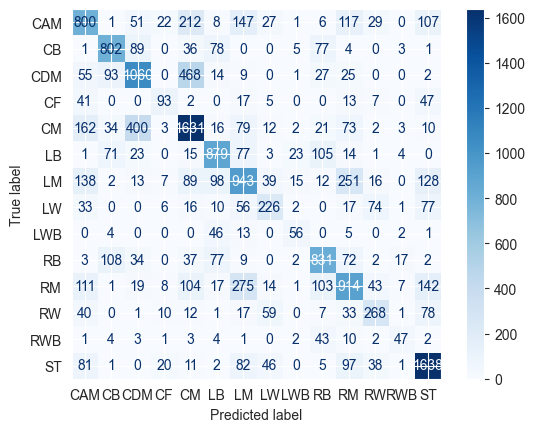

In [33]:
ConfusionMatrixDisplay.from_estimator(rf_classifier, X_train, y_train, cmap="Blues")

Much better than below.. so the model dose good on train but bad on test. Is the model overfitted?

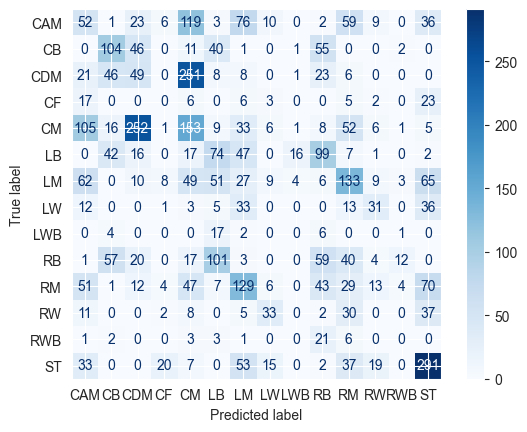

In [34]:
ConfusionMatrixDisplay.from_estimator(rf_classifier, X_test, y_test, cmap="Blues")

CM is classified as CDM, very often.

In [39]:
# Hyperparameters to try
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [41]:
# Find best parameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

Fitting 2 folds for each of 288 candidates, totalling 576 fits


PicklingError: Could not pickle the task to send it to the workers.